In [2]:
import os
os.getcwd()

'C:\\Users\\b\\Desktop\\remote internship 2020\\python codes'

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
df_use=pd.read_csv('flights.csv')
df=df_use.sample(n=100000).copy()
del df_use

In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1253050,2015,3,22,7,AA,359,N3EPAA,LGA,ORD,1918,...,2125.0,27.0,0,0,NaN,27.0,0.0,0.0,0.0,0.0
3904396,2015,8,31,1,AA,2126,N961UW,LGA,BOS,600,...,651.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2816572,2015,6,26,5,WN,549,N720WN,BWI,ALB,1420,...,1603.0,33.0,0,0,NaN,0.0,0.0,15.0,18.0,0.0
1624384,2015,4,14,2,OO,6535,N771SK,OKC,LAX,1634,...,1739.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5595770,2015,12,17,4,EV,2730,N905EV,MEI,PIB,1435,...,1455.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.groupby('DEPARTURE_DELAY').size()

DEPARTURE_DELAY
-39.0      1
-35.0      1
-32.0      1
-26.0      2
-25.0      5
          ..
 1015.0    1
 1021.0    1
 1076.0    1
 1099.0    1
 1269.0    1
Length: 466, dtype: int64

In [6]:
df=df.loc[~df.CANCELLED.isin([1])]

In [7]:
df['OUTPUT_LABEL']=(df.DEPARTURE_DELAY>=0).astype(int)

In [8]:
def cal_prevalence(y_actual):
    return(sum(y_actual)/len(y_actual))

In [9]:
print('Prevalence:%.3f'%cal_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.429


In [10]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,OUTPUT_LABEL
1253050,2015,3,22,7,AA,359,N3EPAA,LGA,ORD,1918,...,27.0,0,0,NaN,27.0,0.0,0.0,0.0,0.0,1
3904396,2015,8,31,1,AA,2126,N961UW,LGA,BOS,600,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2816572,2015,6,26,5,WN,549,N720WN,BWI,ALB,1420,...,33.0,0,0,NaN,0.0,0.0,15.0,18.0,0.0,1
1624384,2015,4,14,2,OO,6535,N771SK,OKC,LAX,1634,...,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
5595770,2015,12,17,4,EV,2730,N905EV,MEI,PIB,1435,...,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df.OUTPUT_LABEL.value_counts()

0    56229
1    42234
Name: OUTPUT_LABEL, dtype: int64

In [12]:
df_airports=pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [13]:
df.loc[~df.ORIGIN_AIRPORT.isin(df_airports.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHERS'
df.loc[~df.DESTINATION_AIRPORT.isin(df_airports.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHERS'

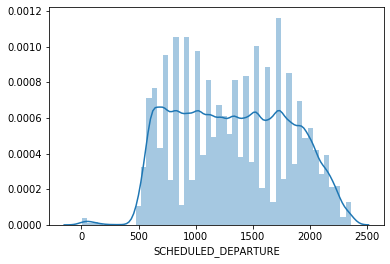

In [16]:
import seaborn as sns
sns.distplot(df['SCHEDULED_DEPARTURE'])

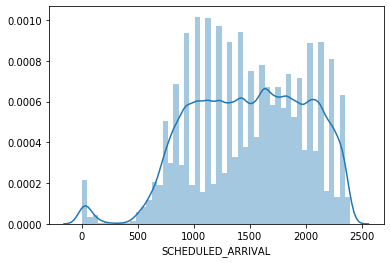

In [17]:
sns.distplot(df['SCHEDULED_ARRIVAL'])